# English Premier League (EPL) Pythagorean Predictor

## Step 1

In [22]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the data. 
# EPL results for the 2017/18 season

EPL18 = pd.read_excel('Assignment Data/Week 1/EPL2017-18.xlsx')
print(EPL18.columns.tolist())

# These are the steps you need to take to complete the assignment:
# 1.	Load the datafile (this contains 6 variables: the date, home team, away team, 
# goals scored (FTHG), goals against (FTAG) and the result (H--home win, D--draw, A--away win).

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


## Step 2

In [ ]:
# 2.	Create a value for a home wins (win=1, draw=0.5, loss=0) and away wins and a count variable for each game (=1).

In [24]:
# Our data is in the form of game results. We first identify whether the result was a win for the home team (H),
# the away team (A) or a draw (D). We also create the counting variable.

EPL18['hwinvalue']=np.where(EPL18['FTR']=='H',1,np.where(EPL18['FTR']=='D',.5,0))
EPL18['awinvalue']=np.where(EPL18['FTR']=='A',1,np.where(EPL18['FTR']=='D',.5,0))
EPL18['count']=1

## Step 3

In [ ]:
# 3.	Create a file for games played in 2017 (before date 20180000) and another one for games played in 2018 (after date 20180000).

In [25]:
# divide data into two halves- games before Jan 1 2018 (call them EPL2017) and games after (call them EPL2018)

EPL2017 = EPL18[EPL18.Date < 20180000]
EPL2017

Date        HomeTeam        AwayTeam  FTHG  FTAG FTR  hwinvalue  \
0    20170811         Arsenal       Leicester     4     3   H        1.0   
1    20170812        Brighton        Man City     0     2   A        0.0   
2    20170812         Chelsea         Burnley     2     3   A        0.0   
3    20170812  Crystal Palace    Huddersfield     0     3   A        0.0   
4    20170812         Everton           Stoke     1     0   H        1.0   
5    20170812     Southampton         Swansea     0     0   D        0.5   
6    20170812         Watford       Liverpool     3     3   D        0.5   
7    20170812       West Brom     Bournemouth     1     0   H        1.0   
8    20170813      Man United        West Ham     4     0   H        1.0   
9    20170813       Newcastle       Tottenham     0     2   A        0.0   
10   20170819     Bournemouth         Watford     0     2   A        0.0   
11   20170819         Burnley       West Brom     0     1   A        0.0   
12   20170819       Leicester        Brighton     2     0   H        1.0   
13   20170819       Liverpool  Crystal Palace     1     0   H        1.0   
14   20170819     Southampton        West Ham     3     2   H        1.0   
15   20170819           Stoke         Arsenal     1     0   H        1.0   
16   20170819         Swansea      Man United     0     4   A        0.0   
17   20170820    Huddersfield       Newcastle     1     0   H        1.0   
18   20170820       Tottenham         Chelsea     1     2   A        0.0   
19   20170821        Man City         Everton     1     1   D        0.5   
20   20170826     Bournemouth        Man City     1     2   A        0.0   
21   20170826  Crystal Palace         Swansea     0     2   A        0.0   
22   20170826    Huddersfield     Southampton     0     0   D        0.5   
23   20170826      Man United       Leicester     2     0   H        1.0   
24   20170826       Newcastle        West Ham     3     0   H        1.0   
25   20170826         Watford        Brighton     0     0   D        0.5   
26   20170827         Chelsea         Everton     2     0   H        1.0   
27   20170827       Liverpool         Arsenal     4     0   H        1.0   
28   20170827       Tottenham         Burnley     1     1   D        0.5   
29   20170827       West Brom           Stoke     1     1   D        0.5   
..        ...             ...             ...   ...   ...  ..        ...   
179  20171218         Everton         Swansea     3     1   H        1.0   
180  20171222         Arsenal       Liverpool     3     3   D        0.5   
181  20171223        Brighton         Watford     1     0   H        1.0   
182  20171223         Burnley       Tottenham     0     3   A        0.0   
183  20171223         Everton         Chelsea     0     0   D        0.5   
184  20171223       Leicester      Man United     2     2   D        0.5   
185  20171223        Man City     Bournemouth     4     0   H        1.0   
186  20171223     Southampton    Huddersfield     1     1   D        0.5   
187  20171223           Stoke       West Brom     3     1   H        1.0   
188  20171223         Swansea  Crystal Palace     1     1   D        0.5   
189  20171223        West Ham       Newcastle     2     3   A        0.0   
190  20171226     Bournemouth        West Ham     3     3   D        0.5   
191  20171226         Chelsea        Brighton     2     0   H        1.0   
192  20171226    Huddersfield           Stoke     1     1   D        0.5   
193  20171226       Liverpool         Swansea     5     0   H        1.0   
194  20171226      Man United         Burnley     2     2   D        0.5   
195  20171226       Tottenham     Southampton     5     2   H        1.0   
196  20171226         Watford       Leicester     2     1   H        1.0   
197  20171226       West Brom         Everton     0     0   D        0.5   
198  20171227       Newcastle        Man City     0     1   A        0.0   
199  20171228  Crystal Palace         Arsenal     2     3

In [26]:
EPL2018 = EPL18[EPL18.Date > 20180000]
EPL2018

Date        HomeTeam        AwayTeam  FTHG  FTAG FTR  hwinvalue  \
209  20180101        Brighton     Bournemouth     2     2   D        0.5   
210  20180101         Burnley       Liverpool     1     2   A        0.0   
211  20180101         Everton      Man United     0     2   A        0.0   
212  20180101       Leicester    Huddersfield     3     0   H        1.0   
213  20180101           Stoke       Newcastle     0     1   A        0.0   
214  20180102        Man City         Watford     3     1   H        1.0   
215  20180102     Southampton  Crystal Palace     1     2   A        0.0   
216  20180102         Swansea       Tottenham     0     2   A        0.0   
217  20180102        West Ham       West Brom     2     1   H        1.0   
218  20180103         Arsenal         Chelsea     2     2   D        0.5   
219  20180104       Tottenham        West Ham     1     1   D        0.5   
220  20180113         Chelsea       Leicester     0     0   D        0.5   
221  20180113  Crystal Palace         Burnley     1     0   H        1.0   
222  20180113    Huddersfield        West Ham     1     4   A        0.0   
223  20180113       Newcastle         Swansea     1     1   D        0.5   
224  20180113       Tottenham         Everton     4     0   H        1.0   
225  20180113         Watford     Southampton     2     2   D        0.5   
226  20180113       West Brom        Brighton     2     0   H        1.0   
227  20180114     Bournemouth         Arsenal     2     1   H        1.0   
228  20180114       Liverpool        Man City     4     3   H        1.0   
229  20180115      Man United           Stoke     3     0   H        1.0   
230  20180120         Arsenal  Crystal Palace     4     1   H        1.0   
231  20180120        Brighton         Chelsea     0     4   A        0.0   
232  20180120         Burnley      Man United     0     1   A        0.0   
233  20180120         Everton       West Brom     1     1   D        0.5   
234  20180120       Leicester         Watford     2     0   H        1.0   
235  20180120        Man City       Newcastle     3     1   H        1.0   
236  20180120           Stoke    Huddersfield     2     0   H        1.0   
237  20180120        West Ham     Bournemouth     1     1   D        0.5   
238  20180121     Southampton       Tottenham     1     1   D        0.5   
..        ...             ...             ...   ...   ...  ..        ...   
350  20180428         Swansea         Chelsea     0     1   A        0.0   
351  20180429      Man United         Arsenal     2     1   H        1.0   
352  20180429        West Ham        Man City     1     4   A        0.0   
353  20180430       Tottenham         Watford     2     0   H        1.0   
354  20180504        Brighton      Man United     1     0   H        1.0   
355  20180505     Bournemouth         Swansea     1     0   H        1.0   
356  20180505         Everton     Southampton     1     1   D        0.5   
357  20180505       Leicester        West Ham     0     2   A        0.0   
358  20180505           Stoke  Crystal Palace     1     2   A        0.0   
359  20180505         Watford       Newcastle     2     1   H        1.0   
360  20180505       West Brom       Tottenham     1     0   H        1.0   
361  20180506         Arsenal         Burnley     5     0   H        1.0   
362  20180506         Chelsea       Liverpool     1     0   H        1.0   
363  20180506        Man City    Huddersfield     0     0   D        0.5   
364  20180508         Swansea     Southampton     0     1   A        0.0   
365  20180509         Chelsea    Huddersfield     1     1   D        0.5   
366  20180509       Leicester         Arsenal     3     1   H        1.0   
367  20180509        Man City        Brighton     3     1   H        1.0   
368  20180509       Tottenham       Newcastle     1     0   H        1.0   
369  20180510        West Ham      Man United     0     0   D        0.5   
370  20180513         Burnley     Bournemouth     1     2

## Step 4 (home team)

In [ ]:
# 4.	For the 2017 games, use .groupby to create a dataframe aggregating by home team the variables for count, home wins, goals for and goals against.

In [27]:
# First half the season

# We have to create separate dfs to calculate home team and away team performance.
# Here is the home team df, including only the variables we need.

EPL2017home = EPL2017.groupby(['HomeTeam'])['count','hwinvalue', 'FTHG','FTAG'].sum().reset_index()
EPL2017home = EPL2017home.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})
EPL2017home

team  Ph  hwinvalue  FTHGh  FTAGh
0          Arsenal  10        8.5     25     10
1      Bournemouth  11        4.5     14     17
2         Brighton  10        5.5     10     12
3          Burnley  10        6.0      7      6
4          Chelsea  11        8.5     21      7
5   Crystal Palace  11        5.0     14     18
6          Everton  10        6.5     17     13
7     Huddersfield  11        6.0     10     12
8        Leicester  10        5.0     13     14
9        Liverpool  11        8.5     21      4
10        Man City  10        9.5     36      7
11      Man United  11        9.0     24      5
12       Newcastle  11        4.0      9     13
13     Southampton  11        5.0     13     15
14           Stoke  10        5.0     13     19
15         Swansea  10        3.0      6     15
16       Tottenham  10        7.5     21      8
17         Watford  11        4.5     14     23
18       West Brom  11        4.5     10     15
19        West Ham   9        4.0     10     14

In [28]:
# Now we create the mirror image df for the away team results.

EPL2017away = EPL2017.groupby('AwayTeam')['count','awinvalue', 'FTHG','FTAG'].sum().reset_index()
EPL2017away = EPL2017away.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
EPL2017away

team  Pa  awinvalue  FTHGa  FTAGa
0          Arsenal  11        5.0     16     13
1      Bournemouth  10        3.0     15      6
2         Brighton  11        3.0     13      5
3          Burnley  11        6.5     11     11
4          Chelsea  10        7.0      7     18
5   Crystal Palace  10        2.5     14      4
6          Everton  11        3.5     19      8
7     Huddersfield  10        3.0     20      8
8        Leicester  11        5.0     18     18
9        Liverpool  10        6.5     20     27
10        Man City  11       10.5      5     25
11      Man United  10        6.5     11     19
12       Newcastle  10        3.0     17     10
13     Southampton  10        3.0     15      7
14           Stoke  11        2.5     27     10
15         Swansea  11        3.0     17      7
16       Tottenham  10        5.5     12     18
17         Watford  10        4.5     14     16
18       West Brom  10        2.5     13      5
19        West Ham  11        3.0     24     12

## Step 5 (home team)

In [ ]:
# 5.	Then, use .groupby to create a separate dataframe aggregating by away team the variables for count, away wins, goals for and goals against.

In [29]:
# Merge the home team and away team results

EPL17 = pd.merge(EPL2017home, EPL2017away, on = ['team'])
EPL17

team  Ph  hwinvalue  FTHGh  FTAGh  Pa  awinvalue  FTHGa  FTAGa
0          Arsenal  10        8.5     25     10  11        5.0     16     13
1      Bournemouth  11        4.5     14     17  10        3.0     15      6
2         Brighton  10        5.5     10     12  11        3.0     13      5
3          Burnley  10        6.0      7      6  11        6.5     11     11
4          Chelsea  11        8.5     21      7  10        7.0      7     18
5   Crystal Palace  11        5.0     14     18  10        2.5     14      4
6          Everton  10        6.5     17     13  11        3.5     19      8
7     Huddersfield  11        6.0     10     12  10        3.0     20      8
8        Leicester  10        5.0     13     14  11        5.0     18     18
9        Liverpool  11        8.5     21      4  10        6.5     20     27
10        Man City  10        9.5     36      7  11       10.5      5     25
11      Man United  11        9.0     24      5  10        6.5     11     19
12       Newcastle  11        4.0      9     13  10        3.0     17     10
13     Southampton  11        5.0     13     15  10        3.0     15      7
14           Stoke  10        5.0     13     19  11        2.5     27     10
15         Swansea  10        3.0      6     15  11        3.0     17      7
16       Tottenham  10        7.5     21      8  10        5.5     12     18
17         Watford  11        4.5     14     23  10        4.5     14     16
18       West Brom  11        4.5     10     15  10        2.5     13      5
19        West Ham   9        4.0     10     14  11        3.0     24     12

## Step 6 (home team)

In [ ]:
# 6.	Rename the variables to denote whether they are aggregates for home team or away team.

In [30]:
# Sum the results by home and away measures to get the team overall performance for the season

EPL17['W'] = EPL17['hwinvalue']+EPL17['awinvalue']
EPL17['G'] = EPL17['Ph']+EPL17['Pa']
EPL17['GF'] = EPL17['FTHGh']+EPL17['FTAGa']
EPL17['GA'] = EPL17['FTAGh']+EPL17['FTHGa']
EPL17

team  Ph  hwinvalue  FTHGh  FTAGh  Pa  awinvalue  FTHGa  FTAGa  \
0          Arsenal  10        8.5     25     10  11        5.0     16     13   
1      Bournemouth  11        4.5     14     17  10        3.0     15      6   
2         Brighton  10        5.5     10     12  11        3.0     13      5   
3          Burnley  10        6.0      7      6  11        6.5     11     11   
4          Chelsea  11        8.5     21      7  10        7.0      7     18   
5   Crystal Palace  11        5.0     14     18  10        2.5     14      4   
6          Everton  10        6.5     17     13  11        3.5     19      8   
7     Huddersfield  11        6.0     10     12  10        3.0     20      8   
8        Leicester  10        5.0     13     14  11        5.0     18     18   
9        Liverpool  11        8.5     21      4  10        6.5     20     27   
10        Man City  10        9.5     36      7  11       10.5      5     25   
11      Man United  11        9.0     24      5  10        6.5     11     19   
12       Newcastle  11        4.0      9     13  10        3.0     17     10   
13     Southampton  11        5.0     13     15  10        3.0     15      7   
14           Stoke  10        5.0     13     19  11        2.5     27     10   
15         Swansea  10        3.0      6     15  11        3.0     17      7   
16       Tottenham  10        7.5     21      8  10        5.5     12     18   
17         Watford  11        4.5     14     23  10        4.5     14     16   
18       West Brom  11        4.5     10     15  10        2.5     13      5   
19        West Ham   9        4.0     10     14  11        3.0     24     12   

       W   G  GF  GA  
0   13.5  21  38  26  
1    7.5  21  20  32  
2    8.5  21  15  25  
3   12.5  21  18  17  
4   15.5  21  39  14  
5    7.5  21  18  32  
6   10.0  21  25  32  
7    9.0  21  18  32  
8   10.0  21  31  32  
9   15.0  21  48  24  
10  20.0  21  61  12  
11  15.5  21  43  16  
12   7.0  21  19  30  
13   8.0  21  20  30  
14   7.5  21  23  46  
15   6.0  21  13  32  
16  13.0  20  39  20  
17   9.0  21  30  37  
18   7.0  21  15  28  
19   7.0  20  22  38

In [31]:
# Create the win percentage and Pythagorean Expectation

EPL17['wpc17'] = EPL17['W']/EPL17['G']
EPL17['pyth17'] = EPL17['GF']**2/(EPL17['GF']**2 + EPL17['GA']**2)
EPL17

team  Ph  hwinvalue  FTHGh  FTAGh  Pa  awinvalue  FTHGa  FTAGa  \
0          Arsenal  10        8.5     25     10  11        5.0     16     13   
1      Bournemouth  11        4.5     14     17  10        3.0     15      6   
2         Brighton  10        5.5     10     12  11        3.0     13      5   
3          Burnley  10        6.0      7      6  11        6.5     11     11   
4          Chelsea  11        8.5     21      7  10        7.0      7     18   
5   Crystal Palace  11        5.0     14     18  10        2.5     14      4   
6          Everton  10        6.5     17     13  11        3.5     19      8   
7     Huddersfield  11        6.0     10     12  10        3.0     20      8   
8        Leicester  10        5.0     13     14  11        5.0     18     18   
9        Liverpool  11        8.5     21      4  10        6.5     20     27   
10        Man City  10        9.5     36      7  11       10.5      5     25   
11      Man United  11        9.0     24      5  10        6.5     11     19   
12       Newcastle  11        4.0      9     13  10        3.0     17     10   
13     Southampton  11        5.0     13     15  10        3.0     15      7   
14           Stoke  10        5.0     13     19  11        2.5     27     10   
15         Swansea  10        3.0      6     15  11        3.0     17      7   
16       Tottenham  10        7.5     21      8  10        5.5     12     18   
17         Watford  11        4.5     14     23  10        4.5     14     16   
18       West Brom  11        4.5     10     15  10        2.5     13      5   
19        West Ham   9        4.0     10     14  11        3.0     24     12   

       W   G  GF  GA     wpc17    pyth17  
0   13.5  21  38  26  0.642857  0.681132  
1    7.5  21  20  32  0.357143  0.280899  
2    8.5  21  15  25  0.404762  0.264706  
3   12.5  21  18  17  0.595238  0.528548  
4   15.5  21  39  14  0.738095  0.885847  
5    7.5  21  18  32  0.357143  0.240356  
6   10.0  21  25  32  0.476190  0.379018  
7    9.0  21  18  32  0.428571  0.240356  
8   10.0  21  31  32  0.476190  0.484131  
9   15.0  21  48  24  0.714286  0.800000  
10  20.0  21  61  12  0.952381  0.962743  
11  15.5  21  43  16  0.738095  0.878385  
12   7.0  21  19  30  0.333333  0.286281  
13   8.0  21  20  30  0.380952  0.307692  
14   7.5  21  23  46  0.357143  0.200000  
15   6.0  21  13  32  0.285714  0.141660  
16  13.0  20  39  20  0.650000  0.791775  
17   9.0  21  30  37  0.428571  0.396651  
18   7.0  21  15  28  0.333333  0.222993  
19   7.0  20  22  38  0.350000  0.251037

## Optional steps, not required for Assessment 
### (Uncomment to run)

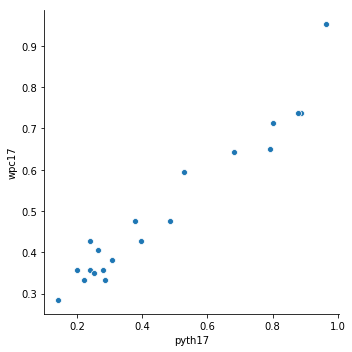

In [32]:
# Plot the data

sns.relplot(x="pyth17", y="wpc17", data =EPL17)

In [33]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc17 ~ pyth17', data=EPL17).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wpc17   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     269.6
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           2.81e-12
Time:                        08:42:51   Log-Likelihood:                 33.822
No. Observations:                  20   AIC:                            -63.64
Df Residuals:                      18   BIC:                            -61.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1978      0.021      9.335      0.000       0.153       0.242
pyth17         0.6551      0.040     16.420      0.000       0.571       0.739
==============================================================================
Omnibus:                        6.775   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                4.322
Skew:                           1.048   Prob(JB):                        0.115
Kurtosis:                       3.891   Cond. No.                         4.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 7 (=Step 4 (away team))

In [ ]:
# 7.	Then merge the home and away dataframes.

In [34]:
EPL2018home = EPL2018.groupby(['HomeTeam'])['count','hwinvalue', 'FTHG','FTAG'].sum().reset_index()
EPL2018home = EPL2018home.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})
EPL2018home

team  Ph  hwinvalue  FTHGh  FTAGh
0          Arsenal   9        7.5     29     10
1      Bournemouth   8        5.0     12     13
2         Brighton   9        5.5     14     13
3          Burnley   9        3.5      9     11
4          Chelsea   8        4.5      9      9
5   Crystal Palace   8        4.5     15      9
6          Everton   9        5.5     11      9
7     Huddersfield   8        2.5      6     13
8        Leicester   9        5.0     12      8
9        Liverpool   8        7.0     24      6
10        Man City   9        7.5     25      7
11      Man United   8        7.0     14      4
12       Newcastle   8        6.0     12      4
13     Southampton   8        2.5      7     11
14           Stoke   9        2.5      7     11
15         Swansea   9        4.5     11      9
16       Tottenham   9        7.5     19      8
17         Watford   8        5.5     13      8
18       West Brom   8        3.0     11     14
19        West Ham  10        6.0     14     12

In [35]:
EPL2018away = EPL2018.groupby('AwayTeam')['count','awinvalue', 'FTHG','FTAG'].sum().reset_index()
EPL2018away = EPL2018away.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
EPL2018away

team  Pa  awinvalue  FTHGa  FTAGa
0          Arsenal   8        1.0     15      7
1      Bournemouth   9        4.0     16     13
2         Brighton   8        1.5     16      5
3          Burnley   8        4.0     11      9
4          Chelsea   9        4.5     15     14
5   Crystal Palace   9        4.5     14     12
6          Everton   8        2.5     17      8
7     Huddersfield   9        2.5     13      4
8        Leicester   8        2.5     20     13
9        Liverpool   9        5.0      8     12
10        Man City   8        6.5      8     20
11      Man United   9        5.5      8     11
12       Newcastle   9        3.0     13      8
13     Southampton   9        4.0     15     10
14           Stoke   8        3.0     11      5
15         Swansea   8        2.0     15      4
16       Tottenham   9        6.5      8     16
17         Watford   9        0.5     19      1
18       West Brom   9        2.5     14      5
19        West Ham   8        3.0     18     12

## Step 7 (=Step 5 (away team))

In [36]:
EPL2018 = pd.merge(EPL2018home, EPL2018away, on = ['team'])
EPL2018

team  Ph  hwinvalue  FTHGh  FTAGh  Pa  awinvalue  FTHGa  FTAGa
0          Arsenal   9        7.5     29     10   8        1.0     15      7
1      Bournemouth   8        5.0     12     13   9        4.0     16     13
2         Brighton   9        5.5     14     13   8        1.5     16      5
3          Burnley   9        3.5      9     11   8        4.0     11      9
4          Chelsea   8        4.5      9      9   9        4.5     15     14
5   Crystal Palace   8        4.5     15      9   9        4.5     14     12
6          Everton   9        5.5     11      9   8        2.5     17      8
7     Huddersfield   8        2.5      6     13   9        2.5     13      4
8        Leicester   9        5.0     12      8   8        2.5     20     13
9        Liverpool   8        7.0     24      6   9        5.0      8     12
10        Man City   9        7.5     25      7   8        6.5      8     20
11      Man United   8        7.0     14      4   9        5.5      8     11
12       Newcastle   8        6.0     12      4   9        3.0     13      8
13     Southampton   8        2.5      7     11   9        4.0     15     10
14           Stoke   9        2.5      7     11   8        3.0     11      5
15         Swansea   9        4.5     11      9   8        2.0     15      4
16       Tottenham   9        7.5     19      8   9        6.5      8     16
17         Watford   8        5.5     13      8   9        0.5     19      1
18       West Brom   8        3.0     11     14   9        2.5     14      5
19        West Ham  10        6.0     14     12   8        3.0     18     12

## Step 7 (=Step 6 (away team))

In [37]:
EPL2018['W'] = EPL2018['hwinvalue']+EPL2018['awinvalue']
EPL2018['G'] = EPL2018['Ph']+EPL2018['Pa']
EPL2018['GF'] = EPL2018['FTHGh']+EPL2018['FTAGa']
EPL2018['GA'] = EPL2018['FTAGh']+EPL2018['FTHGa']
EPL2018

team  Ph  hwinvalue  FTHGh  FTAGh  Pa  awinvalue  FTHGa  FTAGa  \
0          Arsenal   9        7.5     29     10   8        1.0     15      7   
1      Bournemouth   8        5.0     12     13   9        4.0     16     13   
2         Brighton   9        5.5     14     13   8        1.5     16      5   
3          Burnley   9        3.5      9     11   8        4.0     11      9   
4          Chelsea   8        4.5      9      9   9        4.5     15     14   
5   Crystal Palace   8        4.5     15      9   9        4.5     14     12   
6          Everton   9        5.5     11      9   8        2.5     17      8   
7     Huddersfield   8        2.5      6     13   9        2.5     13      4   
8        Leicester   9        5.0     12      8   8        2.5     20     13   
9        Liverpool   8        7.0     24      6   9        5.0      8     12   
10        Man City   9        7.5     25      7   8        6.5      8     20   
11      Man United   8        7.0     14      4   9        5.5      8     11   
12       Newcastle   8        6.0     12      4   9        3.0     13      8   
13     Southampton   8        2.5      7     11   9        4.0     15     10   
14           Stoke   9        2.5      7     11   8        3.0     11      5   
15         Swansea   9        4.5     11      9   8        2.0     15      4   
16       Tottenham   9        7.5     19      8   9        6.5      8     16   
17         Watford   8        5.5     13      8   9        0.5     19      1   
18       West Brom   8        3.0     11     14   9        2.5     14      5   
19        West Ham  10        6.0     14     12   8        3.0     18     12   

       W   G  GF  GA  
0    8.5  17  36  25  
1    9.0  17  25  29  
2    7.0  17  19  29  
3    7.5  17  18  22  
4    9.0  17  23  24  
5    9.0  17  27  23  
6    8.0  17  19  26  
7    5.0  17  10  26  
8    7.5  17  25  28  
9   12.0  17  36  14  
10  14.0  17  45  15  
11  12.5  17  25  12  
12   9.0  17  20  17  
13   6.5  17  17  26  
14   5.5  17  12  22  
15   6.5  17  15  24  
16  14.0  18  35  16  
17   6.0  17  14  27  
18   5.5  17  16  28  
19   9.0  18  26  30

In [38]:
# Create the win percentage and Pythagorean Expectation

EPL2018['wpc18'] = EPL2018['W']/EPL2018['G']
EPL2018['pyth18'] = EPL2018['GF']**2/(EPL2018['GF']**2 + EPL2018['GA']**2)
EPL2018

team  Ph  hwinvalue  FTHGh  FTAGh  Pa  awinvalue  FTHGa  FTAGa  \
0          Arsenal   9        7.5     29     10   8        1.0     15      7   
1      Bournemouth   8        5.0     12     13   9        4.0     16     13   
2         Brighton   9        5.5     14     13   8        1.5     16      5   
3          Burnley   9        3.5      9     11   8        4.0     11      9   
4          Chelsea   8        4.5      9      9   9        4.5     15     14   
5   Crystal Palace   8        4.5     15      9   9        4.5     14     12   
6          Everton   9        5.5     11      9   8        2.5     17      8   
7     Huddersfield   8        2.5      6     13   9        2.5     13      4   
8        Leicester   9        5.0     12      8   8        2.5     20     13   
9        Liverpool   8        7.0     24      6   9        5.0      8     12   
10        Man City   9        7.5     25      7   8        6.5      8     20   
11      Man United   8        7.0     14      4   9        5.5      8     11   
12       Newcastle   8        6.0     12      4   9        3.0     13      8   
13     Southampton   8        2.5      7     11   9        4.0     15     10   
14           Stoke   9        2.5      7     11   8        3.0     11      5   
15         Swansea   9        4.5     11      9   8        2.0     15      4   
16       Tottenham   9        7.5     19      8   9        6.5      8     16   
17         Watford   8        5.5     13      8   9        0.5     19      1   
18       West Brom   8        3.0     11     14   9        2.5     14      5   
19        West Ham  10        6.0     14     12   8        3.0     18     12   

       W   G  GF  GA     wpc18    pyth18  
0    8.5  17  36  25  0.500000  0.674649  
1    9.0  17  25  29  0.529412  0.426330  
2    7.0  17  19  29  0.411765  0.300333  
3    7.5  17  18  22  0.441176  0.400990  
4    9.0  17  23  24  0.529412  0.478733  
5    9.0  17  27  23  0.529412  0.579491  
6    8.0  17  19  26  0.470588  0.348120  
7    5.0  17  10  26  0.294118  0.128866  
8    7.5  17  25  28  0.441176  0.443577  
9   12.0  17  36  14  0.705882  0.868633  
10  14.0  17  45  15  0.823529  0.900000  
11  12.5  17  25  12  0.735294  0.812744  
12   9.0  17  20  17  0.529412  0.580552  
13   6.5  17  17  26  0.382353  0.299482  
14   5.5  17  12  22  0.323529  0.229299  
15   6.5  17  15  24  0.382353  0.280899  
16  14.0  18  35  16  0.777778  0.827144  
17   6.0  17  14  27  0.352941  0.211892  
18   5.5  17  16  28  0.323529  0.246154  
19   9.0  18  26  30  0.500000  0.428934

## Optional steps, not required for Assessment
### (Uncomment to run)

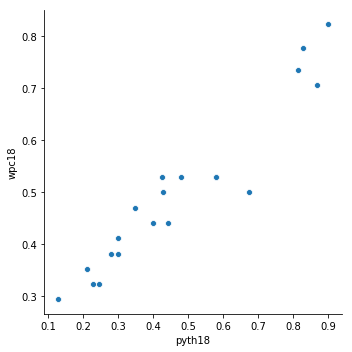

In [39]:
# Plot the data

sns.relplot(x="pyth18", y="wpc18", data =EPL2018)

In [40]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc18 ~ pyth18', data=EPL2018).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wpc18   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     191.1
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           5.02e-11
Time:                        08:46:19   Log-Likelihood:                 34.030
No. Observations:                  20   AIC:                            -64.06
Df Residuals:                      18   BIC:                            -62.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2040      0.024      8.586      0.000       0.154       0.254
pyth18         0.6237      0.045     13.823      0.000       0.529       0.718
==============================================================================
Omnibus:                        5.199   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.933
Skew:                          -0.826   Prob(JB):                        0.231
Kurtosis:                       3.890   Cond. No.                         5.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 8

In [ ]:
# 8.	Sum the values of home and away wins, games, goals for and goals against, then create the values for win percentage (wpc) and the Pythagorean expectation (pyth). 

In [50]:
Half2predictor = pd.merge(EPL17,EPL2018[['team','wpc18','pyth18']], on='team')
Half2predictor

team  Ph  hwinvalue  FTHGh  FTAGh  Pa  awinvalue  FTHGa  FTAGa  \
0          Arsenal  10        8.5     25     10  11        5.0     16     13   
1      Bournemouth  11        4.5     14     17  10        3.0     15      6   
2         Brighton  10        5.5     10     12  11        3.0     13      5   
3          Burnley  10        6.0      7      6  11        6.5     11     11   
4          Chelsea  11        8.5     21      7  10        7.0      7     18   
5   Crystal Palace  11        5.0     14     18  10        2.5     14      4   
6          Everton  10        6.5     17     13  11        3.5     19      8   
7     Huddersfield  11        6.0     10     12  10        3.0     20      8   
8        Leicester  10        5.0     13     14  11        5.0     18     18   
9        Liverpool  11        8.5     21      4  10        6.5     20     27   
10        Man City  10        9.5     36      7  11       10.5      5     25   
11      Man United  11        9.0     24      5  10        6.5     11     19   
12       Newcastle  11        4.0      9     13  10        3.0     17     10   
13     Southampton  11        5.0     13     15  10        3.0     15      7   
14           Stoke  10        5.0     13     19  11        2.5     27     10   
15         Swansea  10        3.0      6     15  11        3.0     17      7   
16       Tottenham  10        7.5     21      8  10        5.5     12     18   
17         Watford  11        4.5     14     23  10        4.5     14     16   
18       West Brom  11        4.5     10     15  10        2.5     13      5   
19        West Ham   9        4.0     10     14  11        3.0     24     12   

       W   G  GF  GA     wpc17    pyth17     wpc18    pyth18  
0   13.5  21  38  26  0.642857  0.681132  0.500000  0.674649  
1    7.5  21  20  32  0.357143  0.280899  0.529412  0.426330  
2    8.5  21  15  25  0.404762  0.264706  0.411765  0.300333  
3   12.5  21  18  17  0.595238  0.528548  0.441176  0.400990  
4   15.5  21  39  14  0.738095  0.885847  0.529412  0.478733  
5    7.5  21  18  32  0.357143  0.240356  0.529412  0.579491  
6   10.0  21  25  32  0.476190  0.379018  0.470588  0.348120  
7    9.0  21  18  32  0.428571  0.240356  0.294118  0.128866  
8   10.0  21  31  32  0.476190  0.484131  0.441176  0.443577  
9   15.0  21  48  24  0.714286  0.800000  0.705882  0.868633  
10  20.0  21  61  12  0.952381  0.962743  0.823529  0.900000  
11  15.5  21  43  16  0.738095  0.878385  0.735294  0.812744  
12   7.0  21  19  30  0.333333  0.286281  0.529412  0.580552  
13   8.0  21  20  30  0.380952  0.307692  0.382353  0.299482  
14   7.5  21  23  46  0.357143  0.200000  0.323529  0.229299  
15   6.0  21  13  32  0.285714  0.141660  0.382353  0.280899  
16  13.0  20  39  20  0.650000  0.791775  0.777778  0.827144  
17   9.0  21  30  37  0.428571  0.396651  0.352941  0.211892  
18   7.0  21  15  28  0.333333  0.222993  0.323529  0.246154  
19   7.0  20  22  38  0.350000  0.251037  0.500000  0.428934

## Step 9

In [ ]:
# 9.	Now repeat steps 4-8 for the 2018 games. Be sure to give different names for wpc and pyth in 2017 and 2018.

In [51]:
keyvars = Half2predictor[['team','wpc17','wpc18','pyth17','pyth18']]
keyvars.corr()

wpc17     wpc18    pyth17    pyth18
wpc17   1.000000  0.756573  0.968204  0.745832
wpc18   0.756573  1.000000  0.795693  0.955986
pyth17  0.968204  0.795693  1.000000  0.795331
pyth18  0.745832  0.955986  0.795331  1.000000

In [ ]:
# 10.	Now merge 2017 and 2018 summary files.

In [45]:
# # Now we merge the two dfs

# Half2predictor = pd.merge(Half1perf,Half2perf, on='team')
# Half2predictor

team  count1  win1  R1  RA1      wpc1     pyth1  count2  win2  \
0          Arsenal      21    11  38   26  0.523810  0.681132      17     8   
1      Bournemouth      21     5  20   32  0.238095  0.280899      17     6   
2         Brighton      21     5  15   25  0.238095  0.264706      17     4   
3          Burnley      21     9  18   17  0.428571  0.528548      17     5   
4          Chelsea      21    14  39   14  0.666667  0.885847      17     7   
5   Crystal Palace      21     4  18   32  0.190476  0.240356      17     7   
6          Everton      21     7  25   32  0.333333  0.379018      17     6   
7     Huddersfield      21     6  18   32  0.285714  0.240356      17     3   
8        Leicester      21     7  31   32  0.333333  0.484131      17     5   
9        Liverpool      21    11  48   24  0.523810  0.800000      17    10   
10        Man City      21    19  61   12  0.904762  0.962743      17    13   
11      Man United      21    13  43   16  0.619048  0.878385      17    12   
12       Newcastle      21     5  19   30  0.238095  0.286281      17     7   
13     Southampton      21     4  20   30  0.190476  0.307692      17     3   
14           Stoke      21     5  23   46  0.238095  0.200000      17     2   
15         Swansea      21     4  13   32  0.190476  0.141660      17     4   
16       Tottenham      20    11  39   20  0.550000  0.791775      18    12   
17         Watford      21     7  30   37  0.333333  0.396651      17     4   
18       West Brom      21     2  15   28  0.095238  0.222993      17     4   
19        West Ham      20     4  22   38  0.200000  0.251037      18     6   

    R2  RA2      wpc2     pyth2  
0   36   25  0.470588  0.674649  
1   25   29  0.352941  0.426330  
2   19   29  0.235294  0.300333  
3   18   22  0.294118  0.400990  
4   23   24  0.411765  0.478733  
5   27   23  0.411765  0.579491  
6   19   26  0.352941  0.348120  
7   10   26  0.176471  0.128866  
8   25   28  0.294118  0.443577  
9   36   14  0.588235  0.868633  
10  45   15  0.764706  0.900000  
11  25   12  0.705882  0.812744  
12  20   17  0.411765  0.580552  
13  17   26  0.176471  0.299482  
14  12   22  0.117647  0.229299  
15  15   24  0.235294  0.280899  
16  35   16  0.666667  0.827144  
17  14   27  0.235294  0.211892  
18  16   28  0.235294  0.246154  
19  26   30  0.333333  0.428934

In [ ]:
# 11.	Now generate a correlation matrix for the wpc and pyth variables for 2017 and 2018

In [46]:
# # The two plots look similar
# # We can be more precise still if we compare the correlation coefficients. The first row of the table shows the 
# # correlation of win percentage in second half of the season against itself, win percentage in the first half of the season,
# # Pythagorean Expectation in the first half of the season, and Pythagorean Expectation in the second half of the season.
# # Our focus is on comparing the second and third columns.

# keyvars = Half2predictor[['team','wpc2','wpc1','pyth1','pyth2']]
# keyvars.corr()

wpc2      wpc1     pyth1     pyth2
wpc2   1.000000  0.797319  0.832753  0.957439
wpc1   0.797319  1.000000  0.951876  0.729974
pyth1  0.832753  0.951876  1.000000  0.795331
pyth2  0.957439  0.729974  0.795331  1.000000

In [47]:
# # We can also sort the variables to show for each club how close the relationships are between the first and second half
# # of the season

# keyvars = keyvars.sort_values(by=['wpc2'],ascending=False)
# keyvars

team      wpc2      wpc1     pyth1     pyth2
10        Man City  0.764706  0.904762  0.962743  0.900000
11      Man United  0.705882  0.619048  0.878385  0.812744
16       Tottenham  0.666667  0.550000  0.791775  0.827144
9        Liverpool  0.588235  0.523810  0.800000  0.868633
0          Arsenal  0.470588  0.523810  0.681132  0.674649
5   Crystal Palace  0.411765  0.190476  0.240356  0.579491
4          Chelsea  0.411765  0.666667  0.885847  0.478733
12       Newcastle  0.411765  0.238095  0.286281  0.580552
6          Everton  0.352941  0.333333  0.379018  0.348120
1      Bournemouth  0.352941  0.238095  0.280899  0.426330
19        West Ham  0.333333  0.200000  0.251037  0.428934
8        Leicester  0.294118  0.333333  0.484131  0.443577
3          Burnley  0.294118  0.428571  0.528548  0.400990
15         Swansea  0.235294  0.190476  0.141660  0.280899
2         Brighton  0.235294  0.238095  0.264706  0.300333
17         Watford  0.235294  0.333333  0.396651  0.211892
18       West Brom  0.235294  0.095238  0.222993  0.246154
7     Huddersfield  0.176471  0.285714  0.240356  0.128866
13     Southampton  0.176471  0.190476  0.307692  0.299482
14           Stoke  0.117647  0.238095  0.200000  0.229299

## Optional steps, not required for Assessment
### (Uncomment to run)

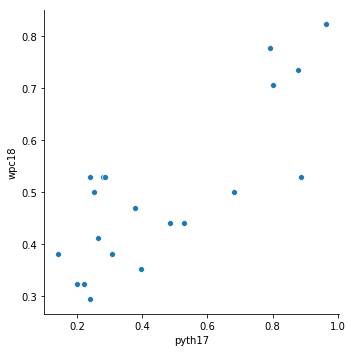

In [52]:
sns.relplot(x="pyth17", y="wpc18", data =Half2predictor)

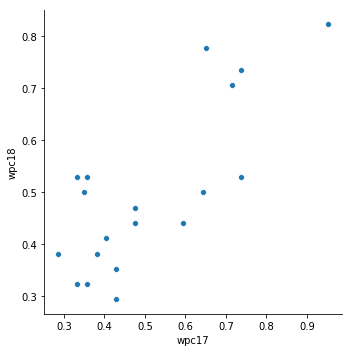

In [53]:
sns.relplot(x="wpc17", y="wpc18", data =Half2predictor)

Now you have completed the assignment, are these results consistent with those we found for Major League Baseball?